In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


In [2]:
horse_data = pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_start_table.csv',names = ['track_id', 'race_date', 'race_number', 'program_number', 'weight_carried', 'jockey', 'odds', 'position_at_finish'])
track_data = pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_race_table.csv')
tracking_data = pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv', names = ['track_id', 'race_date', 'race_number', 'program_number', 'trakus_index', 'latitude', 'longitude'])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **START TABLE**

In [3]:
horse_data.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1


In [4]:
horse_data['odds'] = horse_data['odds']/100
horse_data

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,1,123,Dylan Davis,1.30,2
1,AQU,2019-01-01,1,2,120,Junior Alvarado,2.95,3
2,AQU,2019-01-01,1,3,118,Jose Lezcano,1.80,4
3,AQU,2019-01-01,1,4,123,Jomar Garcia,12.80,5
4,AQU,2019-01-01,1,5,118,Manuel Franco,11.50,1
...,...,...,...,...,...,...,...,...
14910,SAR,2019-09-02,11,3,119,Manuel Franco,14.70,2
14911,SAR,2019-09-02,11,4,119,Jose Lezcano,10.70,5
14912,SAR,2019-09-02,11,6,119,Eric Cancel,11.30,10
14913,SAR,2019-09-02,11,7,119,Irad Ortiz Jr.,4.60,7


In [5]:
horse_data.groupby(['race_date'])['race_date'].count()

race_date
2019-01-01    62
2019-01-04    51
2019-01-05    63
2019-01-06    51
2019-01-10    29
              ..
2019-12-22    79
2019-12-28    80
2019-12-29    72
2019-12-30    58
2019-12-31    58
Name: race_date, Length: 217, dtype: int64

In [6]:
horse_data.groupby(['jockey'])['position_at_finish'].mean().sort_values(ascending=True) #average performance of horse

jockey
Cory Orm                       1.0
Brian Joseph Hernandez Jr.     1.0
Tony Piccone                   2.0
Shaun Bridgmohan               2.0
Stephane Pasquier              2.0
                              ... 
Kevin Gomez                    9.0
Gavin Coetzee                 10.0
Andrea Atzeni                 10.0
Martin Chuan                  12.0
Suguru Hamanaka               13.0
Name: position_at_finish, Length: 178, dtype: float64

<AxesSubplot:xlabel='track_id', ylabel='count'>

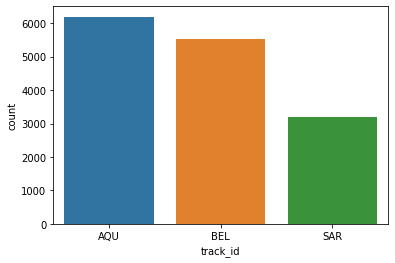

In [7]:
fig, ax = plt.subplots()
sns.countplot(data = horse_data, ax=ax, x='track_id')

In [8]:
horse_data['race_date'] = pd.to_datetime(horse_data['race_date'])
horse_data.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,1,123,Dylan Davis,1.30,2
1,AQU,2019-01-01,1,2,120,Junior Alvarado,2.95,3
2,AQU,2019-01-01,1,3,118,Jose Lezcano,1.80,4
3,AQU,2019-01-01,1,4,123,Jomar Garcia,12.80,5
4,AQU,2019-01-01,1,5,118,Manuel Franco,11.50,1


Text(0.5, 1.0, 'Entry counts')

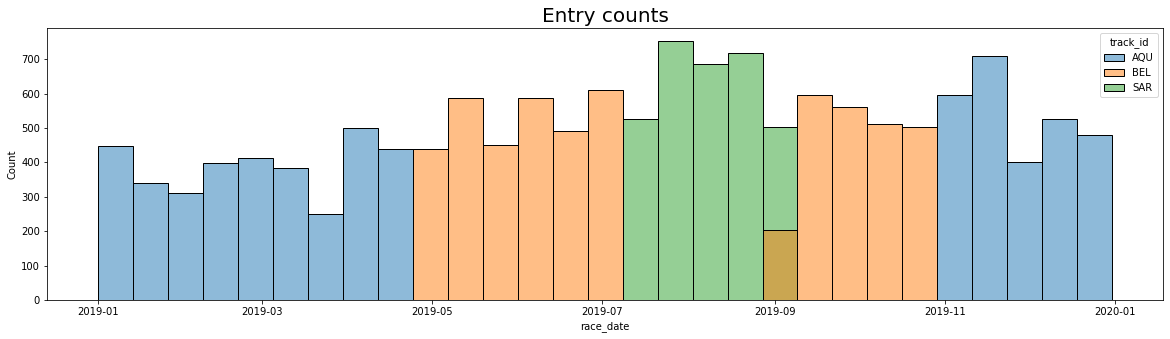

In [9]:
fig, ax = plt.subplots(figsize=(20,5))

sns.histplot(data=horse_data,hue="track_id", ax=ax,x="race_date")
ax.set_title("Entry counts", fontsize=20)

<AxesSubplot:xlabel='race_number', ylabel='count'>

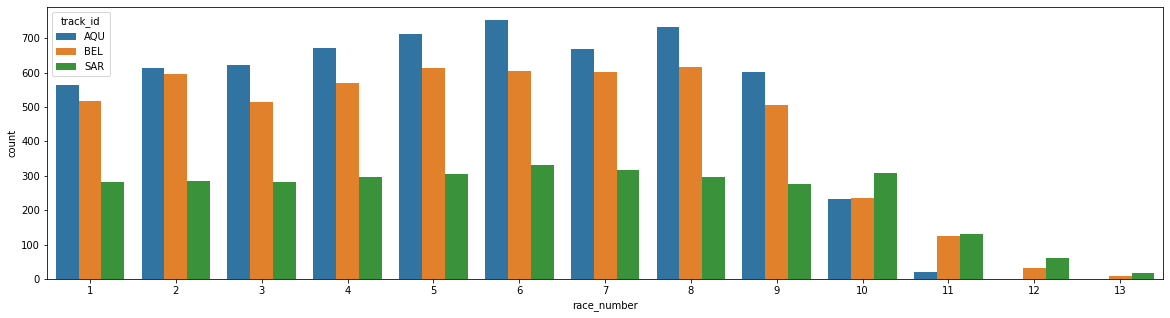

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data = horse_data, ax=ax, x = 'race_number', hue = 'track_id')

In [11]:
horse_data['race_number'] = horse_data['race_number'].astype('int8')

In [12]:
horse_data.program_number.value_counts()

4      1748
3      1743
5      1731
2      1715
1      1708
6      1652
7      1390
8      1066
9       761
10      535
11      333
12      201
1A      164
13       77
14       44
15       24
2B       11
16       10
3X        1
1X        1
Name: program_number, dtype: int64

<AxesSubplot:xlabel='program_number', ylabel='Count'>

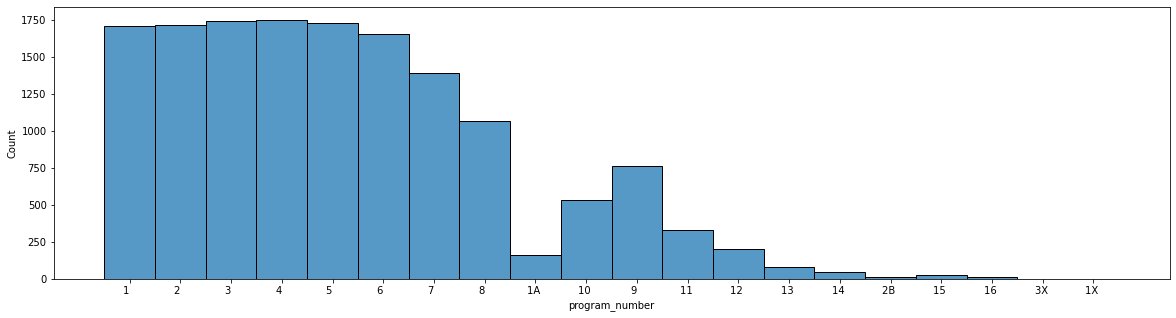

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data = horse_data, ax=ax, x = 'program_number')

<AxesSubplot:xlabel='weight_carried', ylabel='Density'>

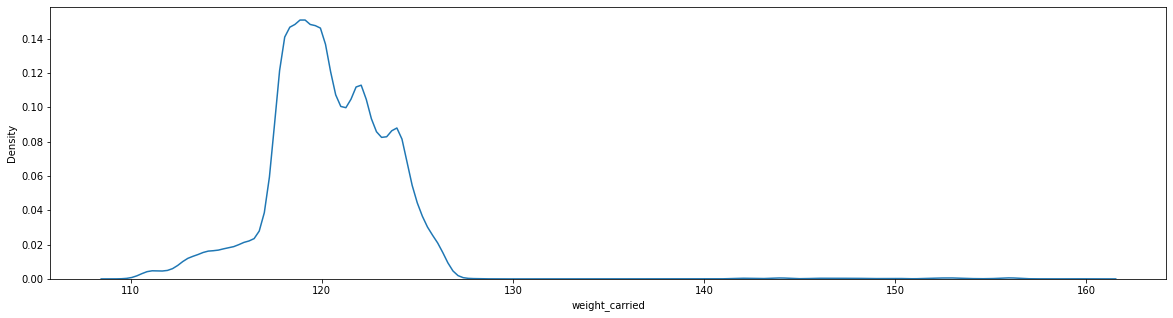

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.kdeplot(data = horse_data, x = 'weight_carried')

<AxesSubplot:xlabel='odds', ylabel='Density'>

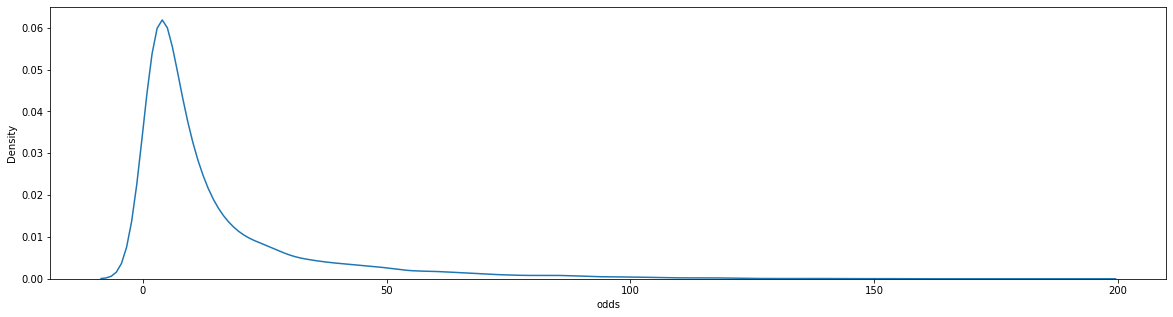

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.kdeplot(data = horse_data, x = 'odds')

# **RACE TABLE**

In [16]:
track_data.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [17]:
track_data['race_date'] = pd.to_datetime(track_data['race_date'])
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   track_id         2000 non-null   object        
 1   race_date        2000 non-null   datetime64[ns]
 2   race_number      2000 non-null   int64         
 3   distance_id      2000 non-null   int64         
 4   course_type      2000 non-null   object        
 5   track_condition  2000 non-null   object        
 6   run_up_distance  2000 non-null   int64         
 7   race_type        2000 non-null   object        
 8   purse            2000 non-null   int64         
 9   post_time        2000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 156.4+ KB


In [18]:
track_data.shape

(2000, 10)

<AxesSubplot:xlabel='course_type', ylabel='count'>

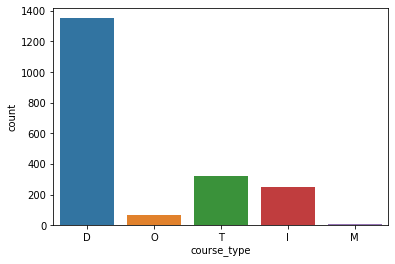

In [19]:
sns.countplot(data = track_data, x = 'course_type')